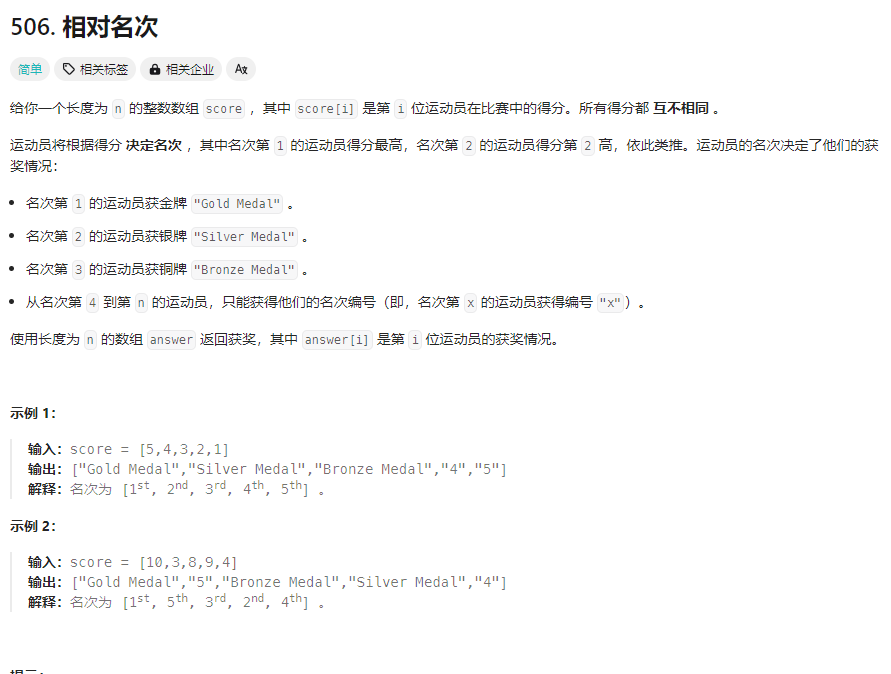

## 直觉思路：
- 想到 线性代数中求矩阵的逆的方法是使用伴随矩阵同时做基本变换操作 使得原矩阵变为单位矩阵后伴随矩阵同时变为原矩阵的逆
- 那么在这个题目中也可类似的去想：让初始化一个升序结果数组，然后将score升序排序，排序过程中的操作同时也对结果数组操作
- 但是好像不太行
## 字典映射
- 先copy一份原数组
- 对原数组排序
- 然后从将排序后的数组与排名对应起来
- 将原数组遍历与字典中得分相同的在当前位置加上排名

In [7]:
from typing import List
import random


class Solution:
    def findRelativeRanks(self, score: List[int]) -> List[str]:
        nums = score.copy()
        size = len(nums)
        def quicksort(nums, left, right):
            pivot = nums[random.randint(left, right)]
            i, j = left, right
            while i <= j:
                while nums[j] > pivot:
                    j -= 1
                while nums[i] < pivot:
                    i += 1
                if i <= j:
                    nums[i], nums[j] = nums[j], nums[i]
                    i += 1
                    j -= 1
            if i < right: quicksort(nums, i, right)
            if j > left: quicksort(nums, left, j)
        quicksort(nums, 0, size - 1)                  # 排序副本


        score_map = {}                                # 初始化字典
        for index, num in enumerate(nums):
            if index == size - 1:
                score_map[num] = "Gold Medal"
            elif index == size - 2:
                score_map[num] = "Silver Medal"
            elif index == size - 3:
                score_map[num] = "Bronze Medal"
            else:
                score_map[num] = str(size - index)
        answer = []
        
        '''for i in score:
            for key, value in score_map.items():    # 用.items()的方法可以遍历剑与值 .values() .keys()分别是只遍历一种 
                if i == key:
                    answer.append(value)
        '''

        answer = [score_map[s] for s in score]
        
        return answer
    
a = Solution()
a.findRelativeRanks([10,3,8,9,4])

['Gold Medal', '5', 'Bronze Medal', 'Silver Medal', '4']

In [ ]:
# 官方的
class Solution:
    def findRelativeRanks(self, score: List[int]) -> List[str]:
        score_sort = sorted(score, reverse=True)
        rank_dict = {}
        for i, s in enumerate(score_sort):
            if i == 0:
                rank_dict[s] = 'Gold Medal'
            elif i == 1:
                rank_dict[s] = 'Silver Medal'
            elif i == 2:
                rank_dict[s] = 'Bronze Medal'
            else:
                rank_dict[s] = str(i + 1)

        result = [rank_dict[s] for s in score]    # 可以自动去字典找
        
        return result